In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import normalize, to_categorical

from matplotlib import pyplot as plt 
plt.style.use('dark_background')

c:\users\claud\desktop\corsi\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\claud\desktop\corsi\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\users\claud\desktop\corsi\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Importo il dataset mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

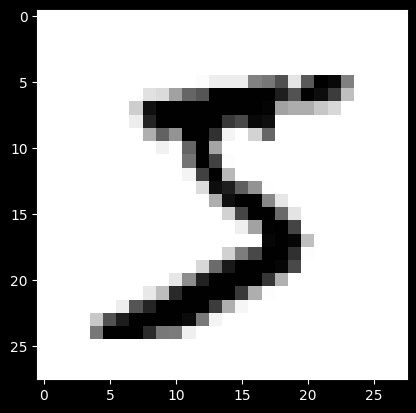

(60000, 28, 28)


In [4]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title = (y_train[0])
plt.show()
print(x_train.shape)

## Normalizzazione delle X e codifica one-hot delle Y

In [5]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis =1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape)

(60000, 28, 28)


## Creazione modello sequenziale ANN 

In [6]:
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(512))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(512))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 activation_1 (Activation)   (None, 512)               0

## Addestramento del modello e illustrazione dei dei risultati di acc e loss

In [8]:
history_dropout = model_dropout.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size =32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 [==============================] - 15s 7ms/step - loss: 0.3267 - accuracy: 0.9017 - val_loss: 0.1071 - val_accuracy: 0.9693
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1671 - accuracy: 0.9483 - val_loss: 0.0905 - val_accuracy: 0.9742
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1370 - accuracy: 0.9578 - val_loss: 0.0766 - val_accuracy: 0.9777
Epoch 4/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1212 - accuracy: 0.9643 - val_loss: 0.0810 - val_accuracy: 0.9762
Epoch 5/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1048 - accuracy: 0.9684 - val_loss: 0.0711 - val_accuracy: 0.9803
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0952 - accuracy: 0.9710 - val_loss: 0.0702 - val_accuracy: 0.9782
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0913 - accuracy: 0.9714 - val_loss: 0.0763 - val_ac

## Illustrazione Errore

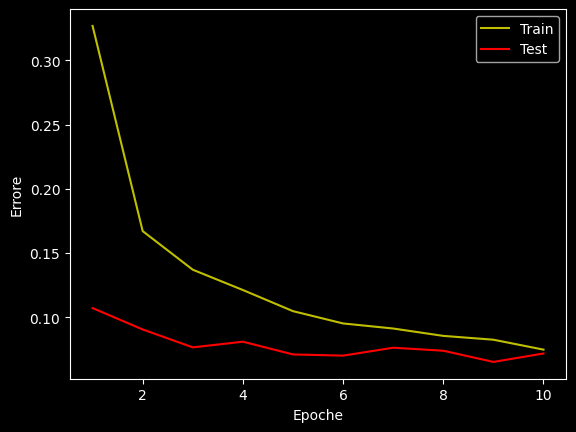

In [18]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']

epochs = range(1, len(loss) + 1)



plt.plot(epochs, loss, 'y', label='Train')
plt.plot(epochs, val_loss, 'r' , label = 'Test')

plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.legend()
plt.show()

## Illustrazione accuratezza

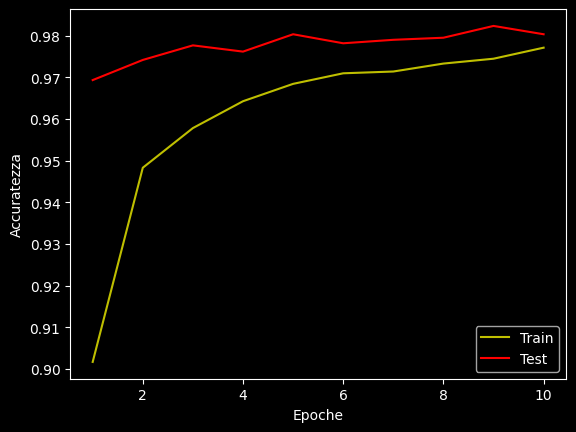

In [19]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Train')
plt.plot(epochs, val_acc, 'r', label='Test')

plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()